In [1]:
%matplotlib inline

In [157]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from IPython.display import clear_output
from scipy.stats import logistic

<function __main__.vis>

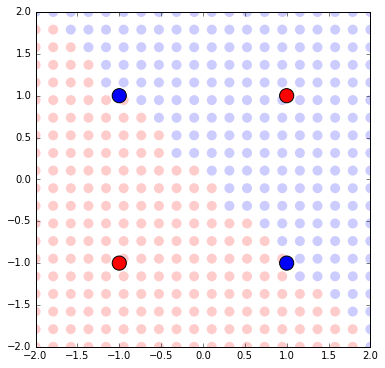

In [190]:
points = np.array([[1, 1, 1],
                   [-1, 1,  -1],
                   [-1, -1, 1],
                   [1, -1, -1]])

def f(x, W, b):
    return W.dot(x) + b

def vis(w1, w2, b):
    W = np.array([w1, w2])

    res = 20
    testps = []
    for x1 in np.linspace(-2, 2, res):
        for x2 in np.linspace(-2, 2, res):
            y = f(np.array([x1, x2]), W, b)
            testps.append([x1, x2, 'r' if y > 0 else 'b'])
            
            
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
            
    testps = np.array(testps)        
    plt.scatter(testps[:,0], testps[:,1], s=100, linewidths=0, c=testps[:,2], alpha=0.2)
    plt.scatter(points[:,0], points[:,1], s=200, c=['r' if p[2] == 1 else 'b' for p in points])
    
interact(vis, w1=(-3,3,.1), w2=(-3,3,.1),b=(-5,5,.25))

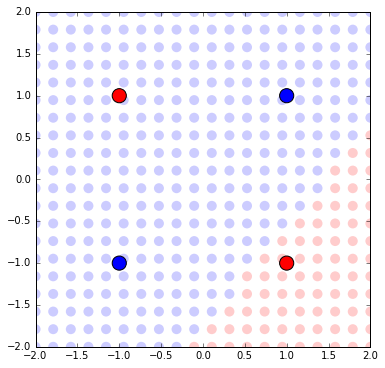

In [193]:
points = np.array([[1, 1, -1],
                   [-1, 1, 1],
                   [-1, -1, -1],
                   [1, -1, 1]])

# points = np.random.random_sample((8, 3)) * 2.0 - 1.0
# points[:,2] = [np.random.randint(2) * 2 - 1 for _ in range(points.shape[0])]

print(points)

w1 = 1.4
w2 = 0.1
b = 0.0

ALPHA = 0.5

for i in range(100):
    data = points[np.random.randint(len(points))]
    
    t = data[2]
    x = data[:2]
    
    W = np.array([w1, w2])
    
    z = W.dot(x) + b
    y = logistic.cdf(z)
    
    dcdy = (y - t)
    dydz = logistic._pdf(z)
    
    w1 -= dcdy * dydz * x[0] * ALPHA
    w2 -= dcdy * dydz * x[1] * ALPHA
    b -= dcdy * dydz * ALPHA
    
    clear_output(wait=True)
    vis(w1, w2, b)
    plt.show()